# Non-linear
## f (x) = 20σ(xW + b) + 31

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("Data/day_head.csv")
data.head()

,# day,head circumference
0,889.0,49.989886
1,209.0,42.739745
2,1838.0,50.931722
3,788.0,50.134411
4,532.0,48.670987


In [4]:
x_data = data['# day']
y_data = data['head circumference']

In [5]:
twenty = tf.constant(value = 20, dtype = tf.float32)
thrty_one = tf.constant(value = 31, dtype = tf.float32)

In [6]:
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# Velger å ta random i variable init grunnet at GDO kan finne et lokalt minima, men jeg vil ha global minima
W = tf.Variable(0.0, dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)

In [7]:
inside = tf.add(tf.multiply(x,W), b)
sig = tf.math.sigmoid(inside)

y_predicted = tf.add(tf.multiply(twenty, sig),thrty_one)


In [8]:
loss = tf.losses.mean_squared_error(labels= y_data, predictions = y_predicted)

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.000000001)
trainer = optimizer.minimize(loss)
init=  tf.global_variables_initializer()

saver = tf.train.Saver()

W0822 17:53:27.441701 4415436224 deprecation.py:323] From /anaconda2/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, "models/day_head.ckpt")
    
    epochs = 100_000
    
    for i in range(epochs):
        rand_ind = np.random.randint(0,len(x_data))
        feed = {x: x_data[rand_ind], y: y_data[rand_ind]}
        
        sess.run(trainer, feed_dict=feed)
        
    model_W, model_b, loss_value = sess.run([W, b, loss], {x: x_data, y: y_data})
    saver.save(sess, "models/day_head.ckpt")

W0822 17:53:27.707759 4415436224 deprecation.py:323] From /anaconda2/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [10]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

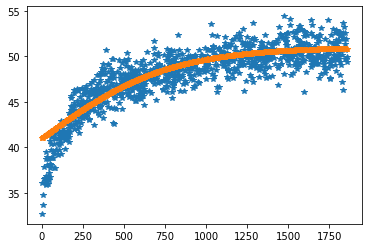

m = 0.0026198383, b = 0.0008354984, loss = 2.6795952


In [11]:
y_hat = []

for x_value in x_data:
    y_hat.append(20*sigmoid(x_value*model_W)+31)
    
plt.plot(x_data,y_data, '*')
plt.plot(x_data, y_hat, '*')
plt.show()
print("m = %s, b = %s, loss = %s" % (model_W, model_b, loss_value))